In [7]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import collections, numpy

In [78]:
bo=pd.read_csv('finalbowl1.csv')
ba=pd.read_csv('finalbat.csv')
ba=ba.drop(columns=['values819','values1617','values1819'])
bo=bo.drop(columns=['values819','values1617','values1819'])
ba.head()

,batsman,finalvalue
0,DA Warner,7.380066
1,V Kohli,7.047097
2,AB de Villiers,6.422000
3,KL Rahul,6.228234
4,S Dhawan,6.220286


In [79]:
bo.head()

,bowler,finalvalue
0,JJ Bumrah,4.702455
1,B Kumar,4.683741
2,UT Yadav,4.383437
3,DJ Bravo,4.262199
4,YS Chahal,4.065331


In [81]:
ba1=ba.rename(columns={'finalvalue':'finalvalueba','batsman':'player'})
bo1=bo.rename(columns={'finalvalue':'finalvaluebo','bowler':'player'})

In [134]:
ar=pd.merge(bo1,ba1,on='player',how='outer')
ar.head()
ar1=ar.drop(columns=['player'])
ar1.head()

,finalvaluebo,finalvalueba
0,4.702455,1.131261
1,4.683741,1.285087
2,4.383437,1.051443
3,4.262199,2.185019
4,4.065331,0.485958


In [135]:
from sklearn import preprocessing

x = ar1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=['bowlerf','batsmanf'])
df.head()

,bowlerf,batsmanf
0,1.000000,0.153286
1,0.996018,0.174129
2,0.932114,0.142471
3,0.906316,0.296070
4,0.864423,0.065847


In [136]:
ar['bowlerf']=df['bowlerf']
ar['batsmanf']=df['batsmanf']
#ar1=ar.bowlerf<=0.91
#ar2=ar[ar1]
ar.head()

,player,finalvaluebo,finalvalueba,bowlerf,batsmanf
0,JJ Bumrah,4.702455,1.131261,1.000000,0.153286
1,B Kumar,4.683741,1.285087,0.996018,0.174129
2,UT Yadav,4.383437,1.051443,0.932114,0.142471
3,DJ Bravo,4.262199,2.185019,0.906316,0.296070
4,YS Chahal,4.065331,0.485958,0.864423,0.065847


In [137]:
ar.to_csv('gg.csv',index=False)

In [107]:
ar3=ar2.batsmanf<=0.9
ar4=ar2[ar3]
ar4.head()

,player,finalvaluebo,finalvalueba,bowlerf,batsmanf
3,DJ Bravo,4.262199,2.185019,0.906316,0.296070
4,YS Chahal,4.065331,0.485958,0.864423,0.065847
5,MJ McClenaghan,3.915535,1.323939,0.832547,0.179394
6,JD Unadkat,3.788283,1.030547,0.805469,0.139639
7,SP Narine,3.784398,3.751521,0.804642,0.508332


In [110]:
ar4['arrvalue']=(ar4['bowlerf']*0.5 + ar4['batsmanf']*0.5)*100
ar5=ar4.sort_values(by='arrvalue',ascending=False)
ar5.to_csv('arr122.csv',index=False)

C:\Users\ishita.kedia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
ar2['rpw']=ar2['batsman_runs']/ar2['wickets']

In [9]:
ar3=ar2.sort_values(by='rpw')
ar3.head()

,Player,total_overs,avg_economy,wickets,avg.runs,batsman_runs,strike,rpw
312,S Lamichhane,35.0,8.657143,14.0,0.0,0.0,0.0,0.0
71,C Nanda,8.0,7.250000,2.0,0.0,0.0,0.0,0.0
132,IC Pandey,77.0,7.909091,19.0,0.0,0.0,0.0,0.0
400,YA Abdulla,35.0,8.885714,15.0,0.0,0.0,0.0,0.0
256,P Raj,5.0,12.000000,1.0,0.0,0.0,0.0,0.0


In [54]:
#ar3.to_csv('allr1.csv',index=False)
ar4=ar3.drop(['Player'],axis=1)
ar5=ar4.rpw<=112
ar6=ar4[ar5]
ar7=ar6.rpw>2.21
ar8=ar6[ar7]
ar8.tail()

,total_overs,avg_economy,wickets,avg.runs,batsman_runs,strike,rpw
95,38.0,8.368421,6.0,11.888889,535.0,124.129930,89.166667
119,13.0,7.461538,5.0,16.518519,446.0,126.345609,89.200000
375,25.0,7.920000,7.0,17.333333,676.0,115.161840,96.571429
291,13.0,7.230769,3.0,15.523810,326.0,136.974790,108.666667
180,29.0,7.517241,9.0,27.805556,1001.0,132.058047,111.222222


In [55]:
from sklearn import preprocessing

x = ar8.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.tail()

,0,1,2,3,4,5,6
153,0.065836,0.477796,0.029940,0.288600,0.146619,0.516382,0.797674
154,0.021352,0.378606,0.023952,0.438913,0.121951,0.529590,0.797980
155,0.042705,0.428750,0.035928,0.465368,0.185698,0.462925,0.865602
156,0.021352,0.353365,0.011976,0.406617,0.088692,0.592948,0.976557
157,0.049822,0.384698,0.047904,0.805375,0.275776,0.563640,1.000000


In [58]:
df.mean()

0    0.161269
1    0.480871
2    0.157167
3    0.314117
4    0.107539
5    0.491854
6    0.178599
dtype: float64

In [57]:
df.std()

0    0.208289
1    0.133947
2    0.214183
3    0.207143
4    0.173759
5    0.155036
6    0.237392
dtype: float64

In [38]:
y=collections.Counter(x)
x=dict(y)

In [53]:
l = []
m = []

In [54]:
for key, value in dict.items(x):
    l.append(key)
    m.append(value)

In [55]:
l

[0.0,
 0.03571428571428571,
 0.058823529411764705,
 0.0625,
 0.09090909090909091,
 0.10526315789473684,
 0.1111111111111111,
 0.11627906976744186,
 0.14285714285714285,
 0.16161616161616163,
 0.16666666666666666,
 0.18181818181818182,
 0.2,
 0.21052631578947367,
 0.21428571428571427,
 0.21568627450980393,
 0.22641509433962265,
 0.24390243902439024,
 0.25,
 0.2631578947368421,
 0.26666666666666666,
 0.2857142857142857,
 0.28888888888888886,
 0.2926829268292683,
 0.29850746268656714,
 0.3170731707317073,
 0.3333333333333333,
 0.33884297520661155,
 0.36363636363636365,
 0.4,
 0.4065934065934066,
 0.4235294117647059,
 0.46153846153846156,
 0.46808510638297873,
 0.47560975609756095,
 0.4883720930232558,
 0.5,
 0.52,
 0.55,
 0.56,
 0.5753424657534246,
 0.6,
 0.6097560975609756,
 0.6153846153846154,
 0.6363636363636364,
 0.6428571428571429,
 0.6626506024096386,
 0.6666666666666666,
 0.6808510638297872,
 0.6818181818181818,
 0.7142857142857143,
 0.75,
 0.7534246575342466,
 0.7692307692307693,


In [56]:
m

[11,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,

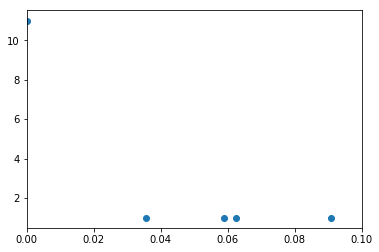

In [65]:
plt.xlim(0,0.1,0.0005)
plt.scatter(l,m)

In [123]:
a = pd.read_csv('MOM819.csv')
a1 = pd.read_csv('1819mom.csv')
a2 = pd.read_csv('1617mom.csv')

In [124]:
a.head()

,bowler,MOM819
0,A Chandila,1.0
1,A Joseph,1.0
2,A Kumble,3.0
3,A Mishra,11.0
4,A Nehra,6.0


In [125]:
aaa = pd.merge(a,a1,on = 'bowler',how='outer')
aaa.head()

,bowler,MOM819,MOM1819
0,A Chandila,1.0,NaN
1,A Joseph,1.0,1.0
2,A Kumble,3.0,NaN
3,A Mishra,11.0,2.0
4,A Nehra,6.0,NaN


In [126]:
aaaa = pd.merge(a2,aaa,on = 'bowler',how='outer')
aaaa.head()

,bowler,MOM1617,MOM819,MOM1819
0,A Mishra,1.0,11.0,2.0
1,A Nehra,1.0,6.0,NaN
2,A Zampa,1.0,1.0,NaN
3,AB Dinda,2.0,2.0,NaN
4,AB de Villiers,4.0,20.0,5.0


In [127]:
bb =aaaa.fillna(0)
bb.head()

,bowler,MOM1617,MOM819,MOM1819
0,A Mishra,1.0,11.0,2.0
1,A Nehra,1.0,6.0,0.0
2,A Zampa,1.0,1.0,0.0
3,AB Dinda,2.0,2.0,0.0
4,AB de Villiers,4.0,20.0,5.0


In [129]:
bb['MOMF'] = (bb['MOM1617']*0.35 + bb['MOM819']*0.15 + bb['MOM1819']*0.5)
bb.sort_values(by='MOMF',ascending=False)

,bowler,MOM1617,MOM819,MOM1819,MOMF
4,AB de Villiers,4.0,20.0,5.0,6.90
51,RG Sharma,5.0,17.0,3.0,5.80
41,MS Dhoni,2.0,17.0,4.0,5.25
5,AD Russell,3.0,11.0,5.0,5.20
60,SR Watson,1.0,15.0,5.0,5.10
15,CH Gayle,1.0,21.0,3.0,5.00
19,DA Warner,4.0,17.0,2.0,4.95
54,Rashid Khan,2.0,7.0,5.0,4.25
64,V Kohli,5.0,12.0,1.0,4.05
52,RR Pant,2.0,6.0,4.0,3.60


In [130]:
bb.to_csv('MOMF.csv',index=False)

In [8]:
g = pd.read_csv('MOMF.csv')
gg = pd.read_csv('gg.csv')


In [9]:
yash = pd.merge(g,gg,on='player',how='outer')

In [10]:
ar1=yash.drop(columns=['player'])
ar1.head()

,MOM1617,MOM819,MOM1819,MOMF,finalvaluebo,finalvalueba,bowlerf,batsmanf
0,1.0,11.0,2.0,3.00,3.285984,1.159525,0.698582,0.157116
1,1.0,6.0,0.0,1.25,1.780518,0.512500,0.378225,0.069444
2,1.0,1.0,0.0,0.50,1.220251,0.396353,0.259003,0.053706
3,2.0,2.0,0.0,1.00,1.611040,0.548822,0.342161,0.074365
4,4.0,20.0,5.0,6.90,NaN,6.422000,NaN,0.870182


In [11]:
from sklearn import preprocessing

x = ar1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=['MOM1617','MOM819','MOM1819','MOMF','finalvaluebo','finalvalueba','bowlerf','batsmanf'])
df.head()

,MOM1617,MOM819,MOM1819,MOMF,finalvaluebo,finalvalueba,bowlerf,batsmanf
0,0.2,0.523810,0.4,0.434783,0.698582,0.157116,0.698582,0.157116
1,0.2,0.285714,0.0,0.181159,0.378225,0.069444,0.378225,0.069444
2,0.2,0.047619,0.0,0.072464,0.259003,0.053706,0.259003,0.053706
3,0.4,0.095238,0.0,0.144928,0.342161,0.074365,0.342161,0.074365
4,0.8,0.952381,1.0,1.000000,NaN,0.870182,NaN,0.870182


In [13]:
df['player']=yash['player']
#ar['batsmanf']=df['batsmanf']
#ar1=ar.bowlerf<=0.91
#ar2=ar[ar1]
df.head()

,MOM1617,MOM819,MOM1819,MOMF,finalvaluebo,finalvalueba,bowlerf,batsmanf,player
0,0.2,0.523810,0.4,0.434783,0.698582,0.157116,0.698582,0.157116,A Mishra
1,0.2,0.285714,0.0,0.181159,0.378225,0.069444,0.378225,0.069444,A Nehra
2,0.2,0.047619,0.0,0.072464,0.259003,0.053706,0.259003,0.053706,A Zampa
3,0.4,0.095238,0.0,0.144928,0.342161,0.074365,0.342161,0.074365,AB Dinda
4,0.8,0.952381,1.0,1.000000,NaN,0.870182,NaN,0.870182,AB de Villiers


In [15]:
df=df.fillna(0)
df.head()

,MOM1617,MOM819,MOM1819,MOMF,finalvaluebo,finalvalueba,bowlerf,batsmanf,player
0,0.2,0.523810,0.4,0.434783,0.698582,0.157116,0.698582,0.157116,A Mishra
1,0.2,0.285714,0.0,0.181159,0.378225,0.069444,0.378225,0.069444,A Nehra
2,0.2,0.047619,0.0,0.072464,0.259003,0.053706,0.259003,0.053706,A Zampa
3,0.4,0.095238,0.0,0.144928,0.342161,0.074365,0.342161,0.074365,AB Dinda
4,0.8,0.952381,1.0,1.000000,0.000000,0.870182,0.000000,0.870182,AB de Villiers


In [16]:
df['bowlF'] = df['MOMF']*0.1 + df['finalvaluebo']*0.9
df['batF'] = df['MOMF']*0.1 + df['finalvalueba']*0.9

In [17]:
df.head()

,MOM1617,MOM819,MOM1819,MOMF,finalvaluebo,finalvalueba,bowlerf,batsmanf,player,bowlF,batF
0,0.2,0.523810,0.4,0.434783,0.698582,0.157116,0.698582,0.157116,A Mishra,0.672202,0.184882
1,0.2,0.285714,0.0,0.181159,0.378225,0.069444,0.378225,0.069444,A Nehra,0.358519,0.080615
2,0.2,0.047619,0.0,0.072464,0.259003,0.053706,0.259003,0.053706,A Zampa,0.240349,0.055582
3,0.4,0.095238,0.0,0.144928,0.342161,0.074365,0.342161,0.074365,AB Dinda,0.322438,0.081422
4,0.8,0.952381,1.0,1.000000,0.000000,0.870182,0.000000,0.870182,AB de Villiers,0.100000,0.883164


In [18]:
df.sort_values(by='bowlF',ascending=False)

,MOM1617,MOM819,MOM1819,MOMF,finalvaluebo,finalvalueba,bowlerf,batsmanf,player,bowlF,batF
27,0.2,0.238095,0.8,0.449275,1.000000,0.153286,1.000000,0.153286,JJ Bumrah,0.944928,0.182885
11,0.6,0.238095,0.0,0.260870,0.996018,0.174129,0.996018,0.174129,B Kumar,0.922503,0.182803
219,0.0,0.380952,0.4,0.318841,0.932114,0.142471,0.932114,0.142471,UT Yadav,0.870787,0.160108
93,0.0,0.142857,0.2,0.137681,0.906316,0.296070,0.906316,0.296070,DJ Bravo,0.829452,0.280231
224,0.0,0.047619,0.0,0.021739,0.864423,0.065847,0.864423,0.065847,YS Chahal,0.780155,0.061436
58,0.4,0.428571,0.6,0.514493,0.804642,0.508332,0.804642,0.508332,SP Narine,0.775627,0.508948
38,0.2,0.095238,0.0,0.094203,0.832547,0.179394,0.832547,0.179394,MJ McClenaghan,0.758713,0.170875
26,0.4,0.238095,0.2,0.282609,0.805469,0.139639,0.805469,0.139639,JD Unadkat,0.753183,0.153936
110,0.0,0.285714,0.8,0.420290,0.785824,0.509235,0.785824,0.509235,HH Pandya,0.749271,0.500340
54,0.4,0.333333,1.0,0.615942,0.757479,0.239160,0.757479,0.239160,Rashid Khan,0.743325,0.276839


In [19]:
df.sort_values(by='batF',ascending=False)

,MOM1617,MOM819,MOM1819,MOMF,finalvaluebo,finalvalueba,bowlerf,batsmanf,player,bowlF,batF
19,0.8,0.809524,0.4,0.717391,0.000000,1.000000,0.000000,1.000000,DA Warner,0.071739,0.971739
64,1.0,0.571429,0.2,0.586957,0.331307,0.954883,0.331307,0.954883,V Kohli,0.356872,0.918090
4,0.8,0.952381,1.0,1.000000,0.000000,0.870182,0.000000,0.870182,AB de Villiers,0.100000,0.883164
55,0.2,0.285714,0.8,0.471014,0.047254,0.842850,0.047254,0.842850,S Dhawan,0.089630,0.805666
136,0.0,0.190476,0.8,0.376812,0.000000,0.843927,0.000000,0.843927,KL Rahul,0.037681,0.797215
52,0.4,0.285714,0.8,0.521739,0.000000,0.826662,0.000000,0.826662,RR Pant,0.052174,0.796170
15,0.2,1.000000,0.6,0.724638,0.174884,0.754056,0.174884,0.754056,CH Gayle,0.229860,0.751114
57,0.4,0.666667,0.0,0.405797,0.225773,0.766410,0.225773,0.766410,SK Raina,0.243776,0.730348
41,0.4,0.809524,0.8,0.760870,0.000000,0.707662,0.000000,0.707662,MS Dhoni,0.076087,0.712983
51,1.0,0.809524,0.6,0.840580,0.052805,0.693140,0.052805,0.693140,RG Sharma,0.131582,0.707884
